In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

In [3]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.shape

(2240, 29)

## 1. Data Preprocessing

In [6]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [7]:
# Missing data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# only 24 missing data, then drop na
df = df.dropna()

In [9]:
# check duplicates
df.duplicated().sum()

0

In [10]:
#transform year_birth to age
df['age'] = 2023-df['Year_Birth']

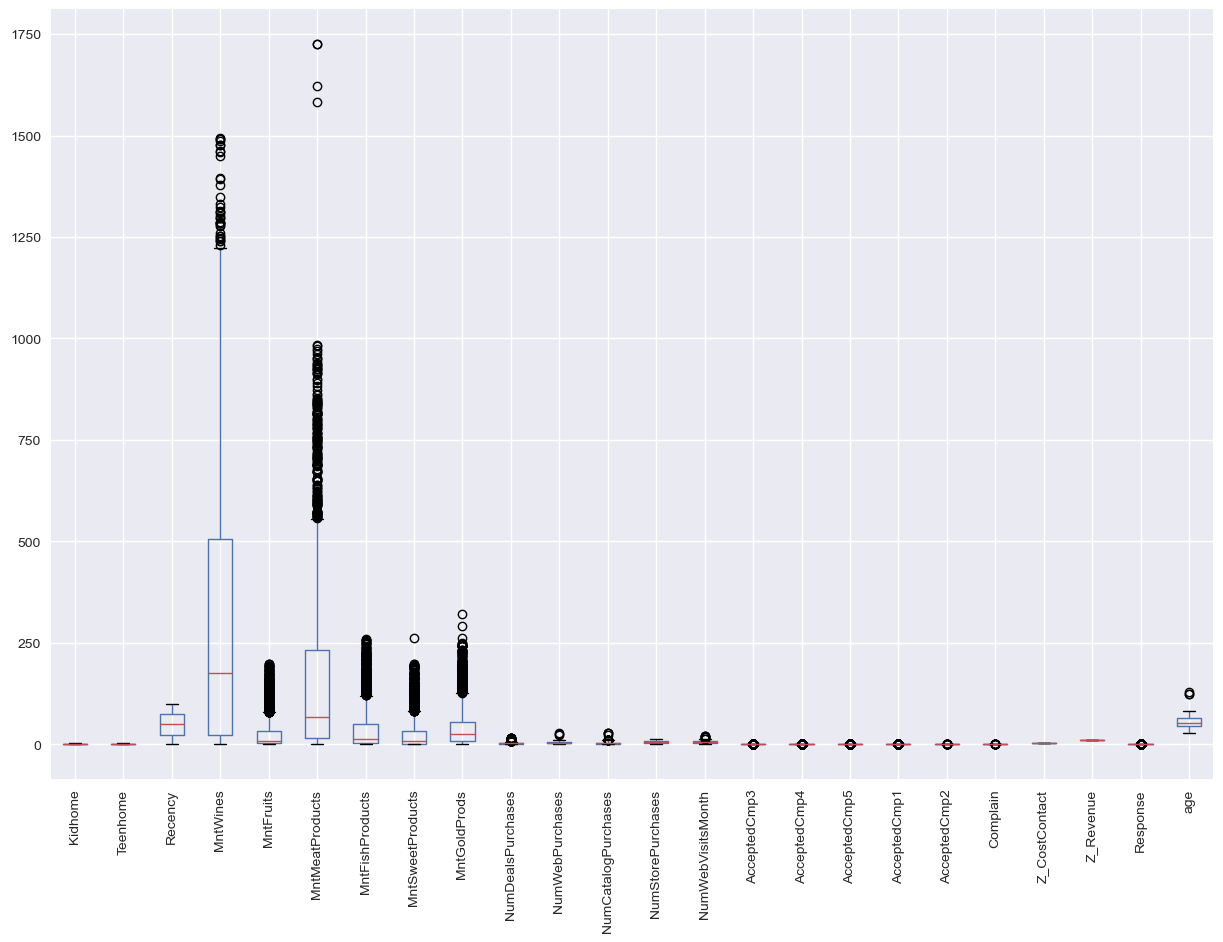

In [11]:
# check for outliers
fig, ax = plt.subplots(figsize=(15, 10))
dfbox = df.drop(['ID','Income','Year_Birth'],axis = 1)
dfbox.boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()

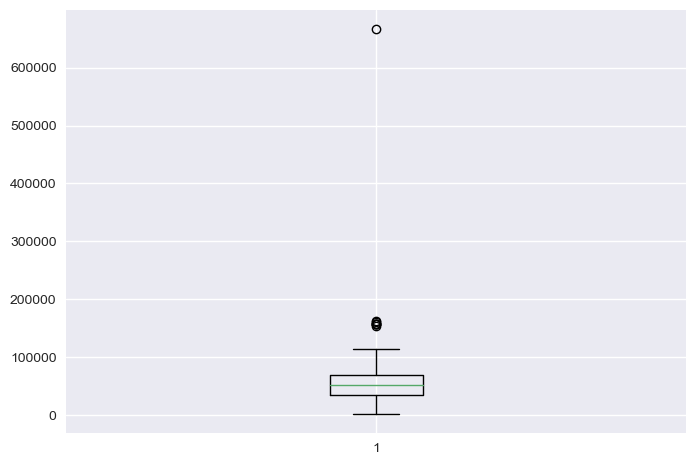

In [12]:
plt.boxplot(df['Income'])
plt.show()

In [13]:
# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Number of outliers in the Income column: 8


In [14]:
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

In [15]:
df.shape

(2208, 30)

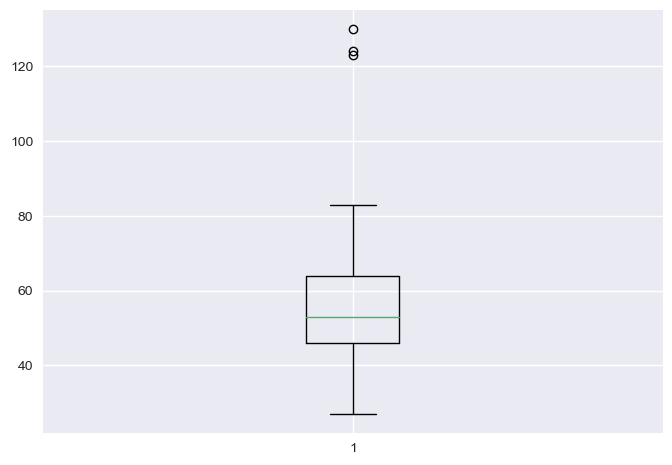

In [16]:
plt.boxplot(df['age'])
plt.show()

In [17]:
# Calculate the IQR for the Income column
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the age column:", len(outliers))

Number of outliers in the age column: 3


In [18]:
df = df[~((df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR)))]

In [19]:
df.shape

(2205, 30)

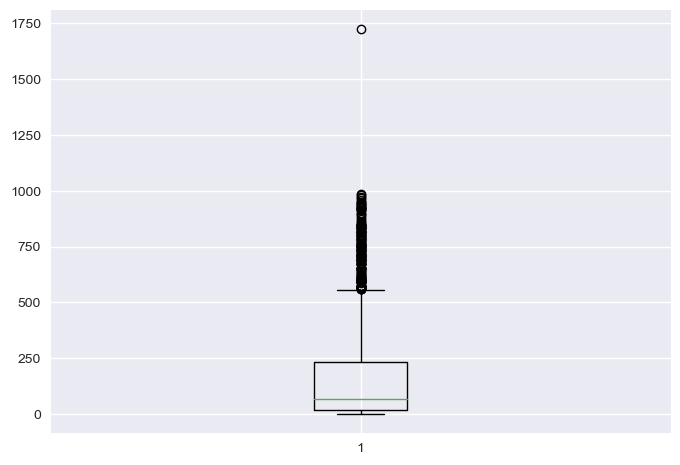

In [20]:
plt.boxplot(df['MntMeatProducts'])
plt.show()

In [21]:
df = df[df['MntMeatProducts']<=1500]
df.shape

(2204, 30)

In [22]:
#Number of accepted campaigns
df['#ofAcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

In [23]:
df['#ofAcceptedCmp'].value_counts()

0    1746
1     322
2      81
3      44
4      11
Name: #ofAcceptedCmp, dtype: int64

In [24]:
#Transform Dt_customer
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
current_date = pd.to_datetime("25-02-2023", format="%d-%m-%Y")
df["Dt_Customer_Days"] = (current_date - df["Dt_Customer"]).dt.days

In [25]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', '#ofAcceptedCmp', 'Dt_Customer_Days'],
      dtype='object')

In [26]:
#drop useless column
df1 = df.drop(['ID','Z_CostContact', 'Z_Revenue','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','Response','Year_Birth','Dt_Customer'],axis = 1)

In [27]:
df1.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'age',
       '#ofAcceptedCmp', 'Dt_Customer_Days'],
      dtype='object')

In [28]:
#Group education in 3 groups
df1['Education'] = df1['Education'].replace({'PhD':'High','Master':'High','Graduation':'High',
                                             '2n Cycle':'Low','Basic':'Middle'})
df1.Education.value_counts()

High      1952
Low        198
Middle      54
Name: Education, dtype: int64

In [29]:
#Group Marital Status in 2 groups
df1['Marital_Status'] = df1['Marital_Status'].replace({'Married':'Together','Single':'Alone','Divorced':'Alone',
                                                       'Widow':'Alone','Absurd':'Alone','YOLO':'Alone'})
df1['Marital_Status'].value_counts()

Together    1421
Alone        783
Name: Marital_Status, dtype: int64

In [30]:
#Whether is parent
df1['is_parent'] = (df1['Kidhome'] + df1['Teenhome'] > 0).astype(int)

In [31]:
#Create RFM columns
df1['Monetary'] = df1['MntWines']+ df1['MntFruits']+ df1['MntMeatProducts']+ df1['MntFishProducts']
+ df1['MntSweetProducts']+ df1['MntGoldProds']
df1['Frequency'] = df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases'] 

In [32]:
df1.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'age',
       '#ofAcceptedCmp', 'Dt_Customer_Days', 'is_parent', 'Monetary',
       'Frequency'],
      dtype='object')

## 3. Dimensionality Reduction

### 3.1 PCA

In [33]:
df2 = df1.drop(['Monetary', 'Frequency'],axis = 1)

In [34]:
# One-hot encode the categorical variables
df2 = pd.get_dummies(df2, columns=["Marital_Status", "Education"])

In [35]:
from sklearn.preprocessing import StandardScaler

# Standardize
scaler = StandardScaler()
df2std = scaler.fit_transform(df2)

In [36]:
df2std.shape

(2204, 25)

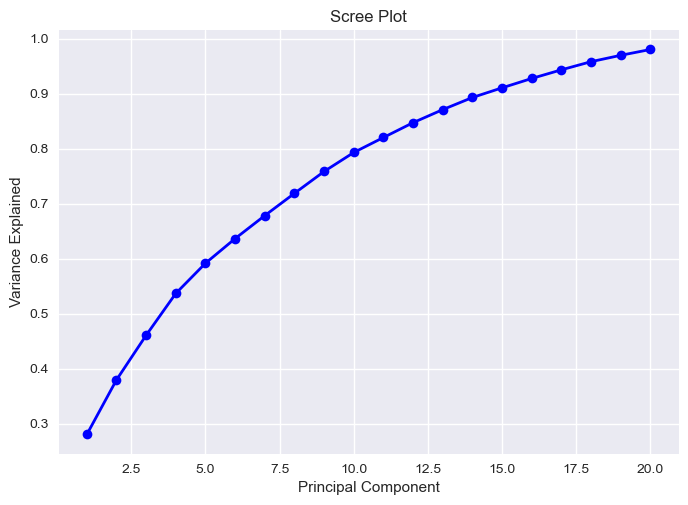

In [37]:
from sklearn.decomposition import PCA
# Initialize the PCA model
pca = PCA(n_components=20)
# Fit and transform the data
df_pca = pca.fit_transform(df2std)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [38]:
pca = PCA()
pca.fit(df2std)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components for 95% explained variance: {num_components}")
pca = PCA(n_components=num_components)
df_pca = pca.fit_transform(df2std)

Number of components for 95% explained variance: 18


### 3.2 TSNE

In [39]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, random_state=123)
df_tsne= tsne.fit_transform(df2std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2204 samples in 0.000s...
[t-SNE] Computed neighbors for 2204 samples in 0.071s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2204
[t-SNE] Computed conditional probabilities for sample 2000 / 2204
[t-SNE] Computed conditional probabilities for sample 2204 / 2204
[t-SNE] Mean sigma: 1.292730
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.406708
[t-SNE] KL divergence after 1000 iterations: 0.799826


### 3.3 UMAP

In [40]:
from umap import UMAP
umap_2d = UMAP(n_components=3, init='random', random_state=0)
df_umap = umap_2d.fit_transform(df2std)
df_umap

array([[ 4.064867 , 10.637605 ,  5.811034 ],
       [13.512263 ,  6.0081186,  6.8493223],
       [ 0.6393055,  8.734849 ,  4.540767 ],
       ...,
       [ 4.083543 , 10.203127 ,  5.516447 ],
       [ 0.852866 ,  2.798013 ,  8.017664 ],
       [ 3.942284 ,  0.6648234,  3.9103231]], dtype=float32)

### 3.4 Kernel PCA

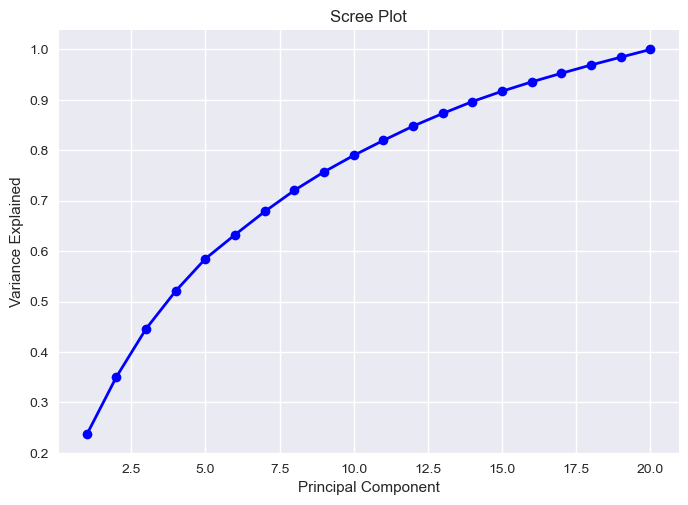

In [41]:
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components=20, kernel='rbf')
df_kpca = scikit_kpca.fit_transform(df2std)
explained_variance = np.var(df_kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
PC_values = np.arange(20) + 1
plt.plot(PC_values, np.cumsum(explained_variance_ratio), 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [42]:
scikit_kpca = KernelPCA(n_components=20, kernel='rbf')
df_kpca = scikit_kpca.fit_transform(df2std)
explained_variance = np.var(df_kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components for 95% explained variance: {num_components}")
scikit_kpca = KernelPCA(n_components=num_components, kernel='rbf')
df_kpca = scikit_kpca.fit_transform(df2std)


Number of components for 95% explained variance: 17


### 4.1 (a) KMeans - PCA

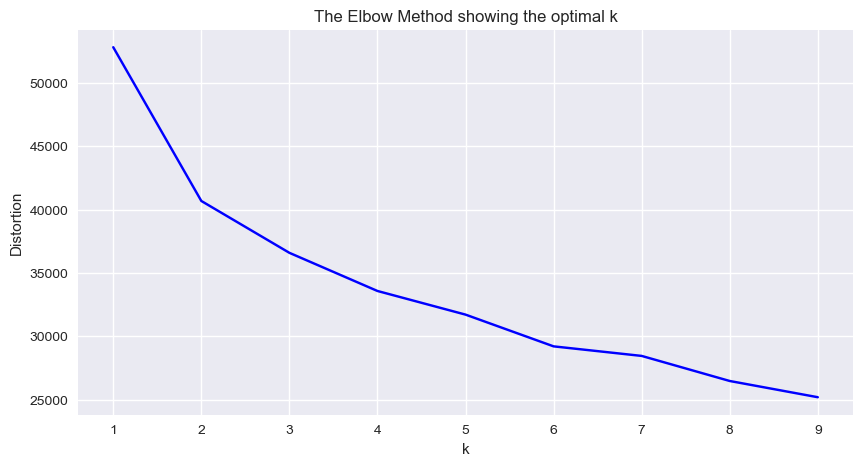

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

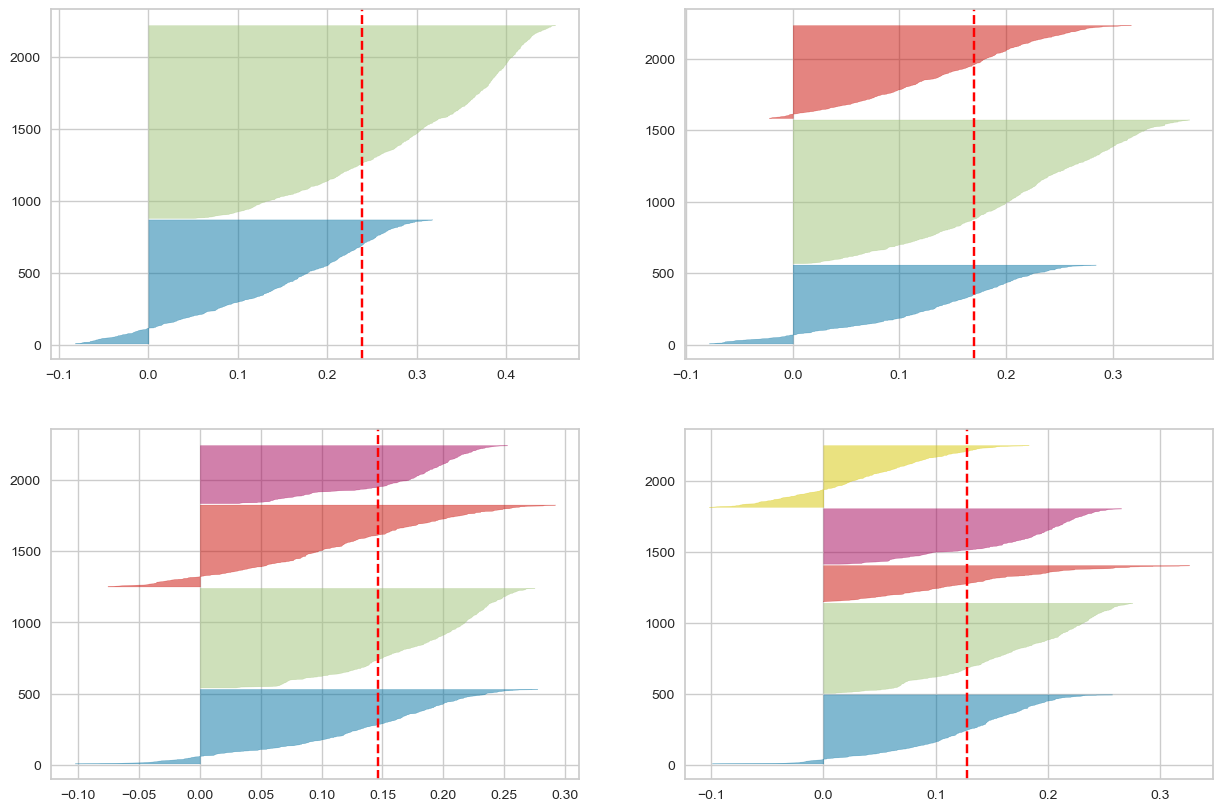

In [44]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,10)) 
for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto") 
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod]) 
    visualizer.fit(df_pca)

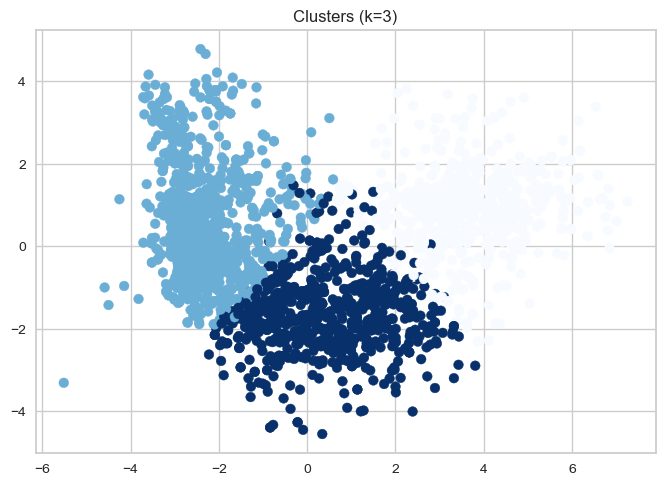

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
labels = kmeans.fit_predict(df_pca)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='Blues')
plt.title('Clusters (k=3)')
plt.show()

In [46]:
df_pca = pd.DataFrame(data = df_pca
             , columns = ['PC '+ str(i+1) for i in range(18)])

In [47]:
df_pca['KMeans'] = pd.Series(kmeans.labels_, index=df_pca.index)
df_pca.reset_index(inplace=True)
df_pca.head()

index      PC 1      PC 2      PC 3      PC 4      PC 5      PC 6  \
0      0  4.135253  0.115645 -1.513254  1.657679  1.642969 -1.214769   
1      1 -2.377093 -0.211521 -2.246260 -0.366042 -1.791266 -0.030177   
2      2  2.184638  0.249278  0.704303 -1.029054  0.051099 -0.265892   
3      3 -2.671917  0.890386  0.472663 -1.480376  0.567997 -0.312758   
4      4 -0.487217 -0.247288  0.829043 -0.642476  0.702904 -1.188301   

       PC 7      PC 8      PC 9     PC 10     PC 11     PC 12     PC 13  \
0  0.852715  0.197718  0.114844 -1.463088 -0.036210  1.434379  1.052463   
1  0.090046 -0.253965  0.153549  0.212930 -0.053798  1.122929  0.114141   
2  0.345789 -0.706549  0.867603 -0.636326 -0.017821 -1.086462  1.034238   
3 -0.938999 -0.913593  0.159674  0.586434  0.067206 -0.441283  0.276384   
4 -0.742075  0.362805 -1.605738  1.422421 -0.410661 -0.291917  1.233343   

      PC 14     PC 15     PC 16     PC 17     PC 18  KMeans  
0  0.513206 -0.287925  0.168671  1.417383 -1.151019       0  
1 -0.285194 -0.222354  0.115395 -0.058729 -0.245631       1  
2  0.665315 -0.673244 -0.261039  0.368122  1.207888       0  
3  0.025649 -0.039361  0.036875  0.025142  0.246597       1  
4 -0.102636  0.071939 -0.256963  0.114029 -0.049712       1

In [48]:
import plotly.express as px
colors_cluster = ['rgb(178,199,200)','rgb(111,174,215)', 'rgb(59,120,175)']

fig = px.scatter_3d(df_pca, x="PC 1",y="PC 2",z="PC 3", color='KMeans', color_continuous_scale=colors_cluster)

fig.show()

In [49]:
df2['KMeans_pca'] = pd.Series(kmeans.labels_, index=df2.index)

In [50]:
df2.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  age  #ofAcceptedCmp  \
0              172                88            88  ...   66               0   
1                2                 1             6  ...   69               0   
2              111                21            42  ...   58               0   
3               10                 3             5  ...   39               0   
4               46                27            15  ...   42               0   

   Dt_Customer_Days  is_parent  Marital_Status_Alone  Marital_Status_Together  \
0              3826          0                     1                        0   
1              3276          1                     1                        0   
2              3475          0                     0                        1   
3              3302          1                     0                        1   
4              3324          1                     0                        1   

   Education_High  Education_Low  Education_Middle  KMeans_pca  
0               1              0                 0           0  
1               1              0                 0           1  
2               1              0                 0           0  
3               1              0                 0           1  
4               1              0                 0           1  

[5 rows x 26 columns]

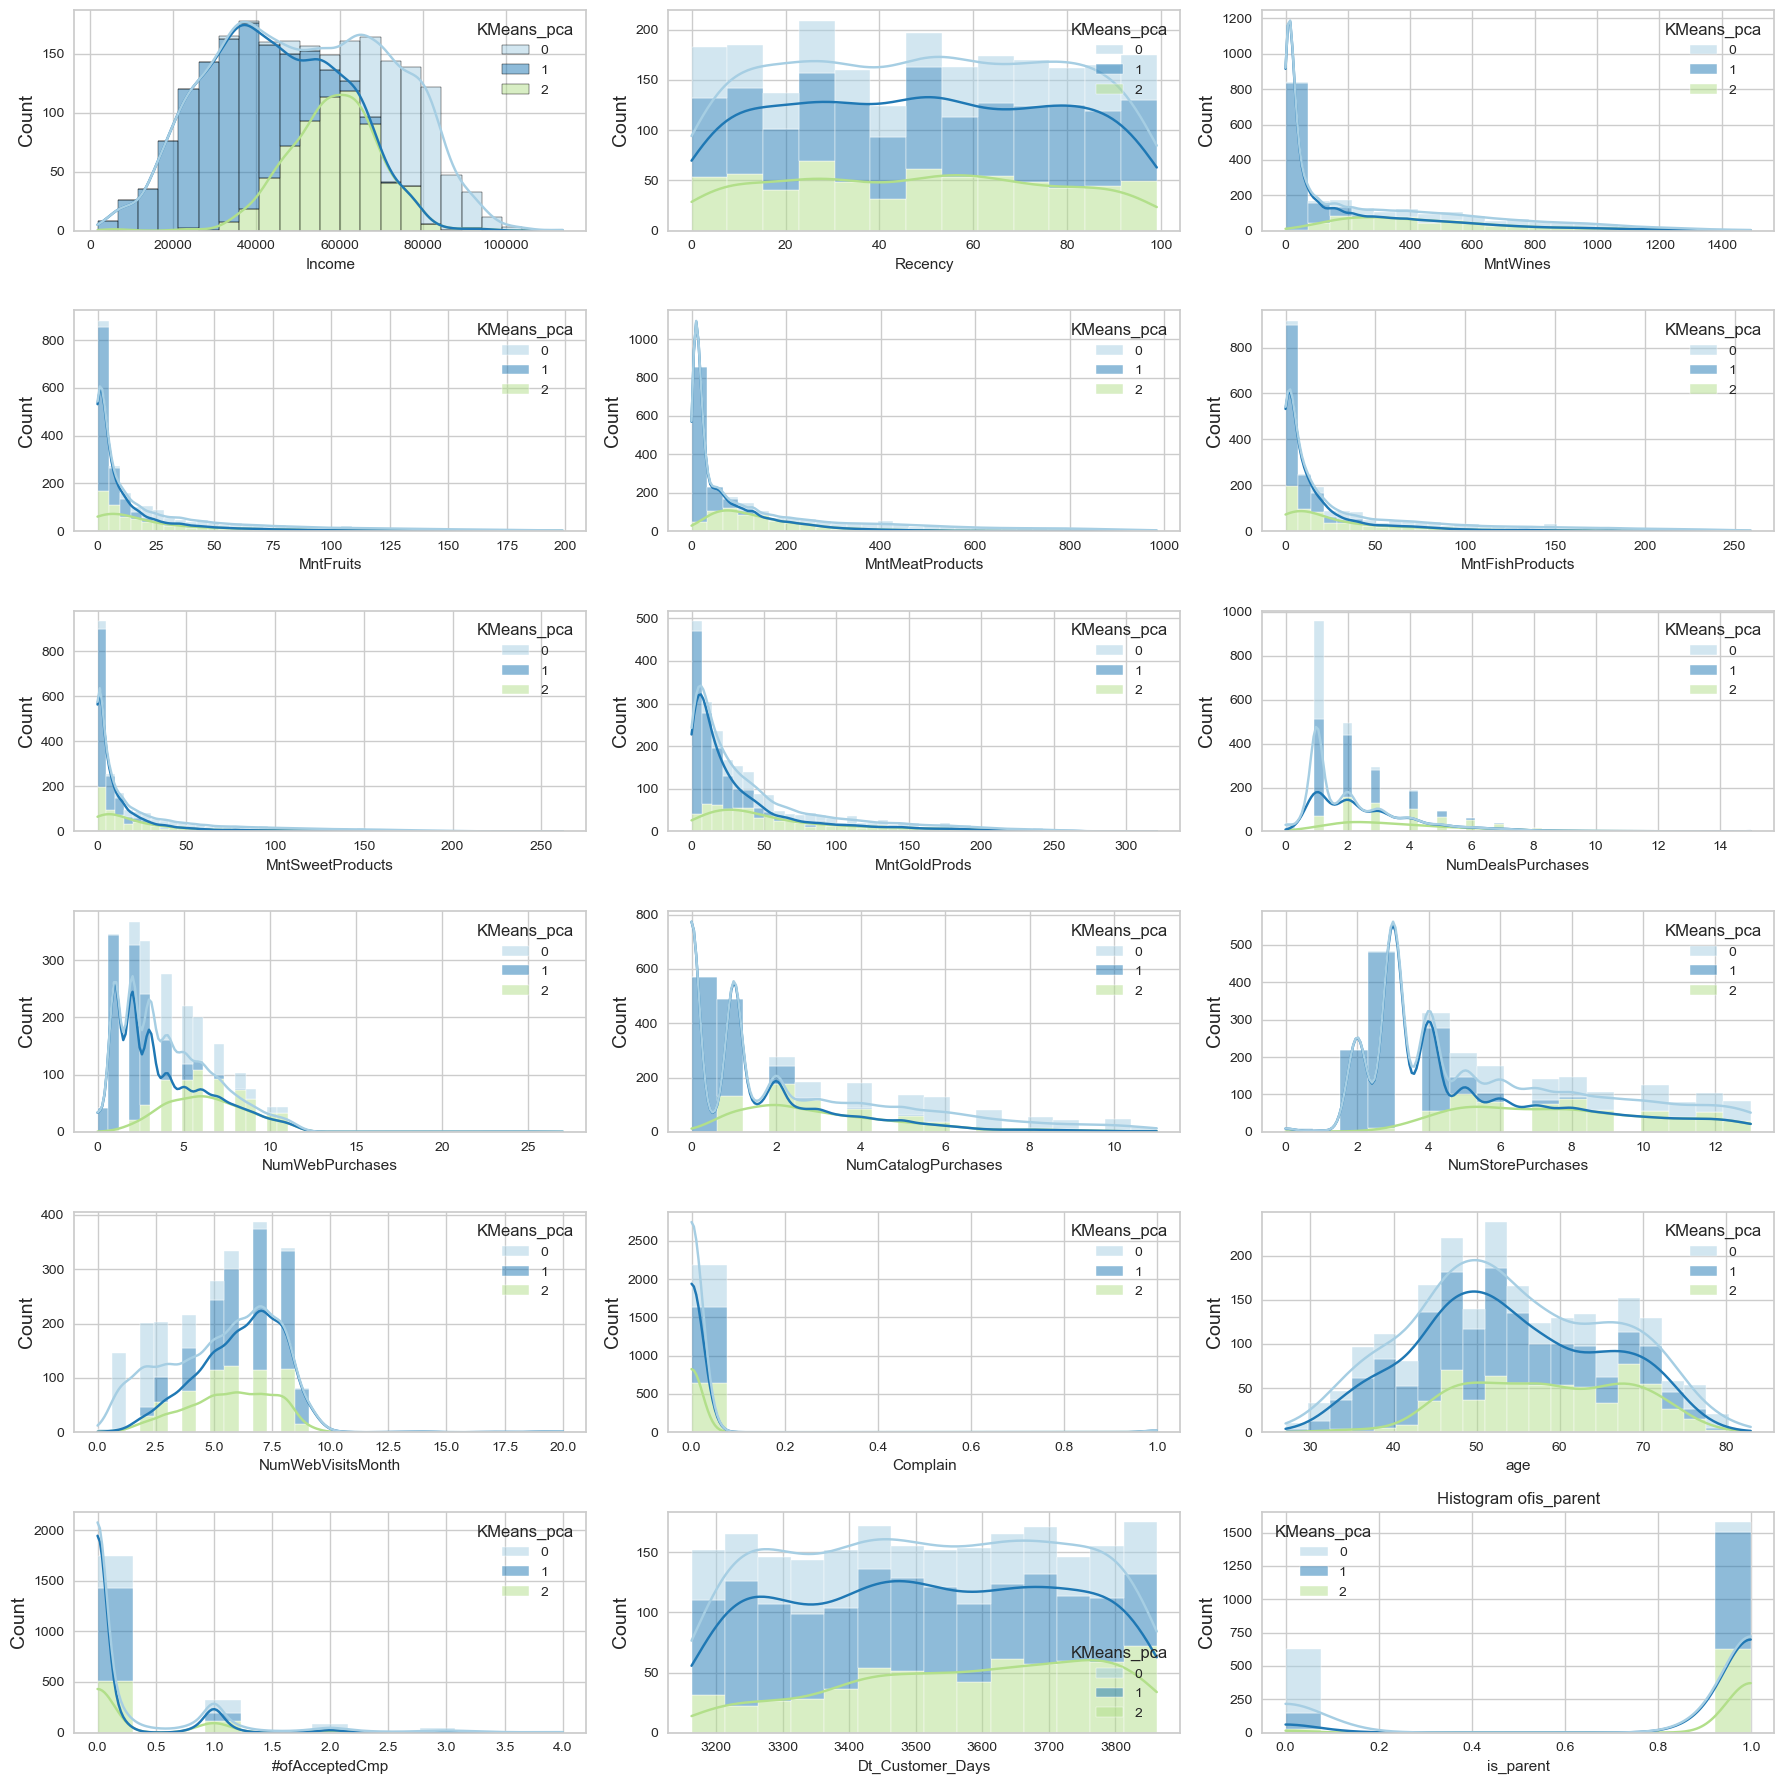

In [51]:
fig,ax=plt.subplots(6,3, figsize=(18,18))
for i,ax in zip(['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'age',
       '#ofAcceptedCmp', 'Dt_Customer_Days','is_parent'],ax.ravel()):
    plt.title("Histogram of" +i)
    h = sns.histplot(df2,x=i,hue="KMeans_pca",
         multiple="stack",kde=True,palette="Paired",
         ax=ax)
    #h.set_xlabel(f'{df2[col].name}', fontsize=14)
    h.set_ylabel('Count', fontsize=14)
    sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

In [52]:
df2.groupby('KMeans_pca').mean()

Income   Kidhome  Teenhome    Recency    MntWines  \
KMeans_pca                                                            
0           75567.947368  0.025408  0.105263  49.455535  611.047187   
1           34105.004980  0.799801  0.433267  49.398406   39.982072   
2           58466.730354  0.241911  0.961479  48.038521  459.573190   

            MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
KMeans_pca                                                                  
0           66.580762       447.907441       100.030853         69.762250   
1            5.034861        22.961155         7.396414          5.220120   
2           25.388290       143.201849        31.909091         24.864407   

            MntGoldProds  ...  Complain        age  #ofAcceptedCmp  \
KMeans_pca                ...                                        
0              75.473684  ...  0.005445  54.515426        0.736842   
1              15.309761  ...  0.011952  51.040837        0.089641   
2              61.922958  ...  0.007704  58.480740        0.252696   

            Dt_Customer_Days  is_parent  Marital_Status_Alone  \
KMeans_pca                                                      
0                3510.056261   0.128857              0.392015   
1                3484.508964   0.876494              0.359562   
2                3571.916795   0.963020              0.317411   

            Marital_Status_Together  Education_High  Education_Low  \
KMeans_pca                                                           
0                          0.607985        0.900181       0.098004   
1                          0.640438        0.832669       0.114542   
2                          0.682589        0.955316       0.044684   

            Education_Middle  
KMeans_pca                    
0                   0.001815  
1                   0.052789  
2                   0.000000  

[3 rows x 25 columns]

In [53]:
silhouette_score(df2.iloc[:,0:25], df2['KMeans_pca'].to_numpy())


0.30007383159658574

### 4.1 (b) DBSCAN - PCA


In [54]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.1, stop=10, step=0.1)
min_sample_list=np.arange(start=2, stop=20, step=1)
 
# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()
 
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(df_pca.drop(['index','KMeans'],axis=1))))>1):
            sil_score=silhouette_score(df_pca.drop(['index','KMeans'],axis=1), db.fit_predict(df_pca.drop(['index','KMeans'],axis=1)))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
 
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

score              parameters
0  0.480322  eps:9.9 min_sample :19

In [55]:
clusters = DBSCAN(eps=9.9, min_samples=19).fit(df_pca.drop(['index','KMeans'],axis=1))


In [56]:
np.unique(clusters.labels_, return_counts=True)

(array([0, 1]), array([2184,   20]))

Because of the imbalanced cluster, despite the high silhouette_scores, the clusters are highly imbalanced. 

### 4.2 (a) KMeans - TSNE

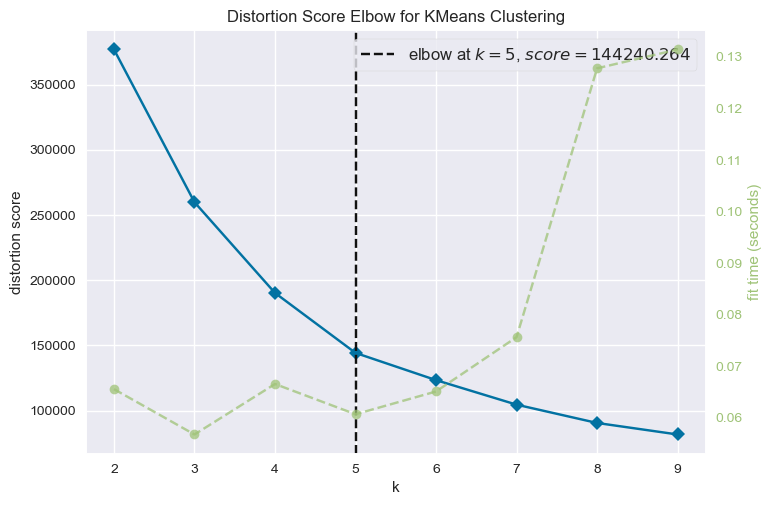

In [57]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df_tsne)        
visualizer.show();      

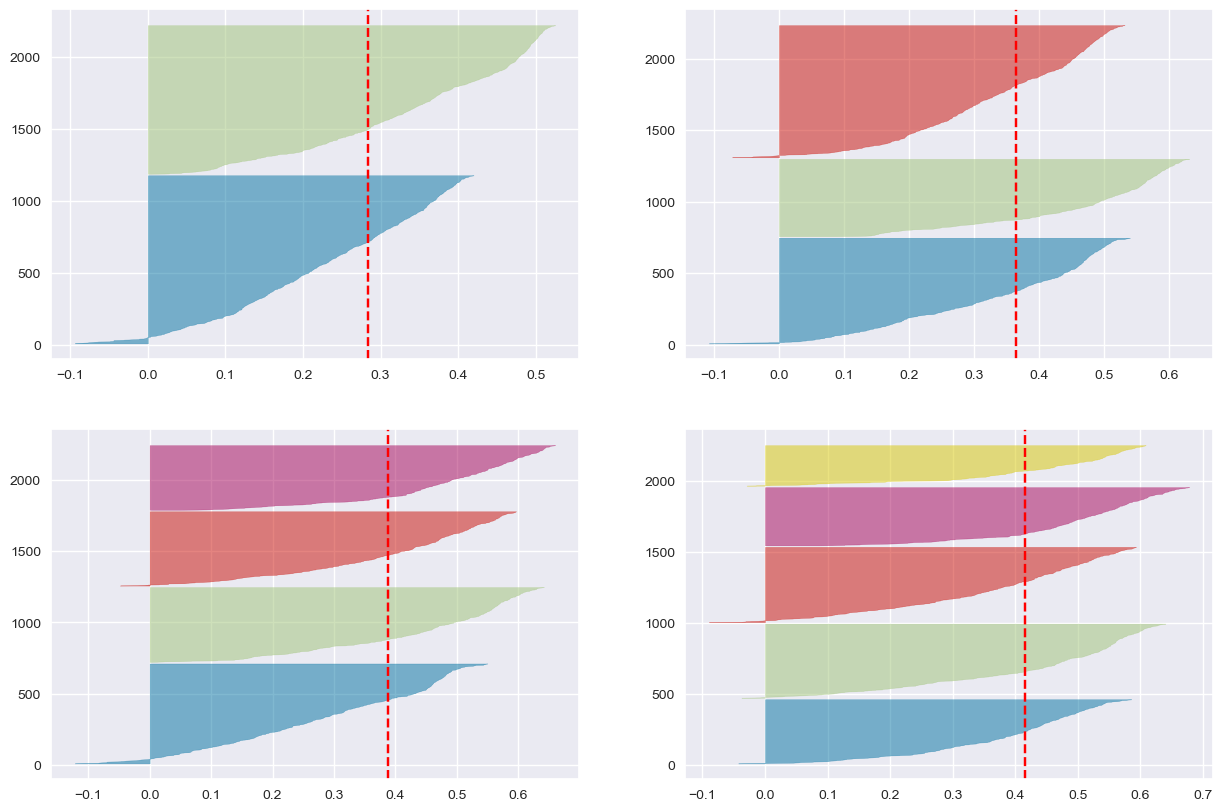

In [58]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,10)) 
for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto") 
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod]) 
    visualizer.fit(df_tsne)

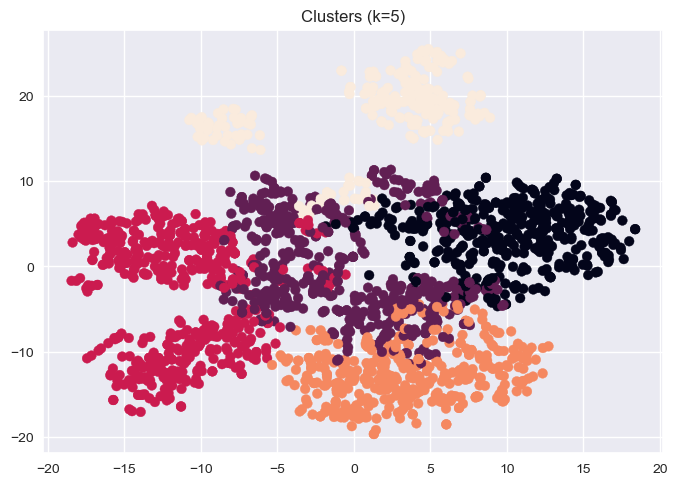

In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")
labels = kmeans.fit_predict(df_tsne)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=labels)
plt.title('Clusters (k=5)')
plt.show()

In [60]:
df_tsne = pd.DataFrame(data = df_tsne
             , columns = ['PC '+ str(i+1) for i in range(3)])

In [61]:
df_tsne['KMeans'] = pd.Series(kmeans.labels_, index=df_tsne.index)
df_tsne.reset_index(inplace=True)
df_tsne.head()

index       PC 1      PC 2       PC 3  KMeans
0      0   8.463486  2.507271  -6.148671       0
1      1  -1.984613 -1.957953 -21.290150       1
2      2   3.682969  4.952260   4.650744       0
3      3 -14.322240  0.643037   8.286352       2
4      4 -12.575941 -1.423638   0.272445       2

In [62]:
import plotly.express as px
fig = px.scatter_3d(df_tsne, x="PC 1",y="PC 2",z="PC 3", color='KMeans')
fig.show()

In [63]:
df2['KMeans_tsne'] = pd.Series(kmeans.labels_, index=df2.index)

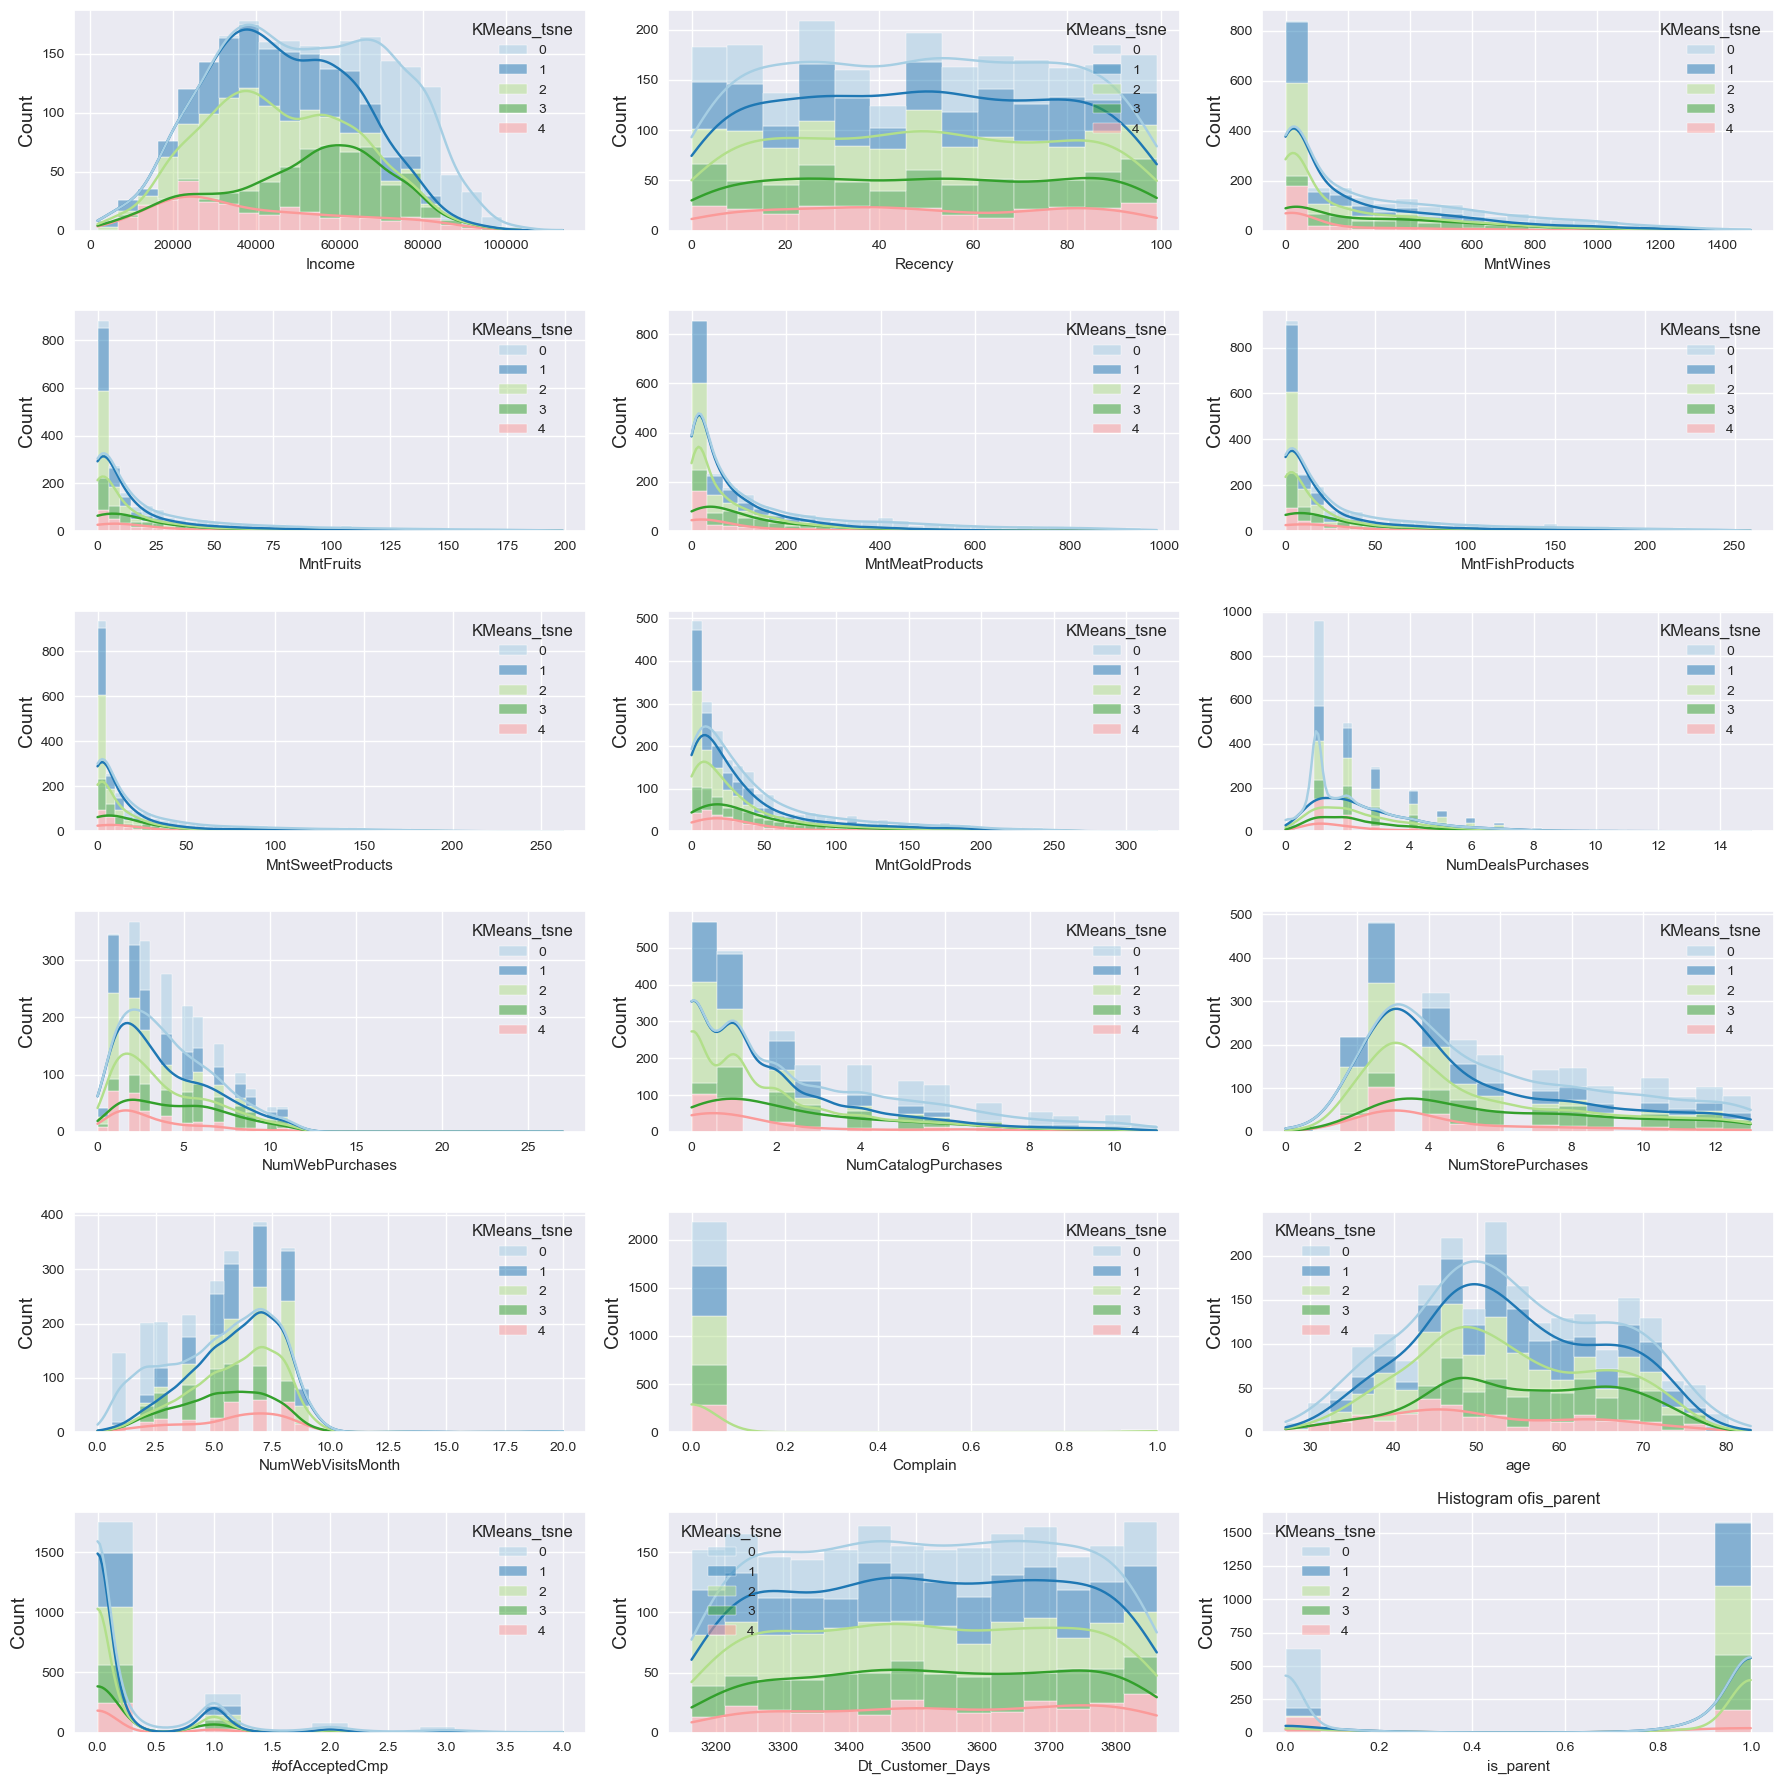

In [64]:
fig,ax=plt.subplots(6,3, figsize=(18,18))
for i,ax in zip(['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'age',
       '#ofAcceptedCmp', 'Dt_Customer_Days','is_parent'],ax.ravel()):
    plt.title("Histogram of" +i)
    h = sns.histplot(df2,x=i,hue="KMeans_tsne",
         multiple="stack",kde=True,palette="Paired",
         ax=ax)
    #h.set_xlabel(f'{df2[col].name}', fontsize=14)
    h.set_ylabel('Count', fontsize=14)
    sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

### 4.2 (b) DBSCAN - TSNE

In [65]:

# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.1, stop=10, step=0.1)
min_sample_list=np.arange(start=2, stop=10, step=1)
 
# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()
 
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(df_tsne.drop(['index','KMeans'],axis=1))))>1):
            sil_score=silhouette_score(df_tsne.drop(['index','KMeans'],axis=1), db.fit_predict(df_tsne.drop(['index','KMeans'],axis=1)))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
 
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

score             parameters
0  0.424104  eps:2.7 min_sample :9

In [66]:
clusters = DBSCAN(eps=2.7, min_samples=9).fit(df_tsne.drop(['index','KMeans'],axis=1))


In [67]:
np.unique(clusters.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 42, 226, 128, 311, 259, 404, 199,  54, 234, 195, 132,  20]))

### 4.3 (a) KMeans - UMAP

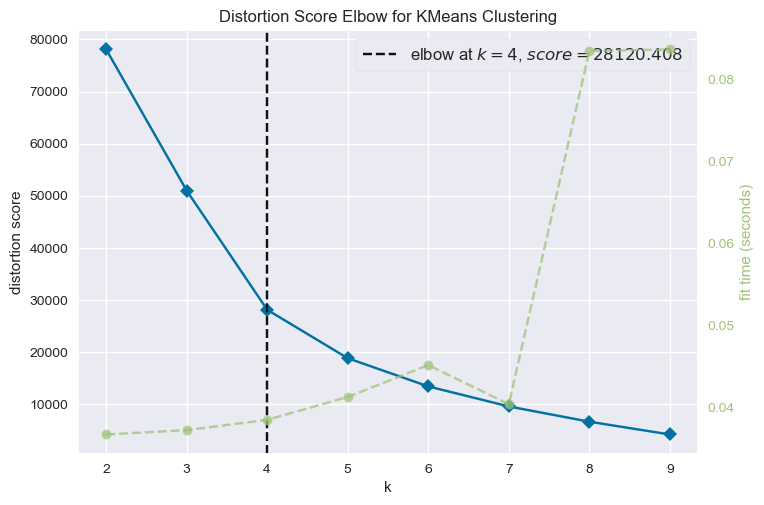

In [68]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df_umap)        
visualizer.show();      

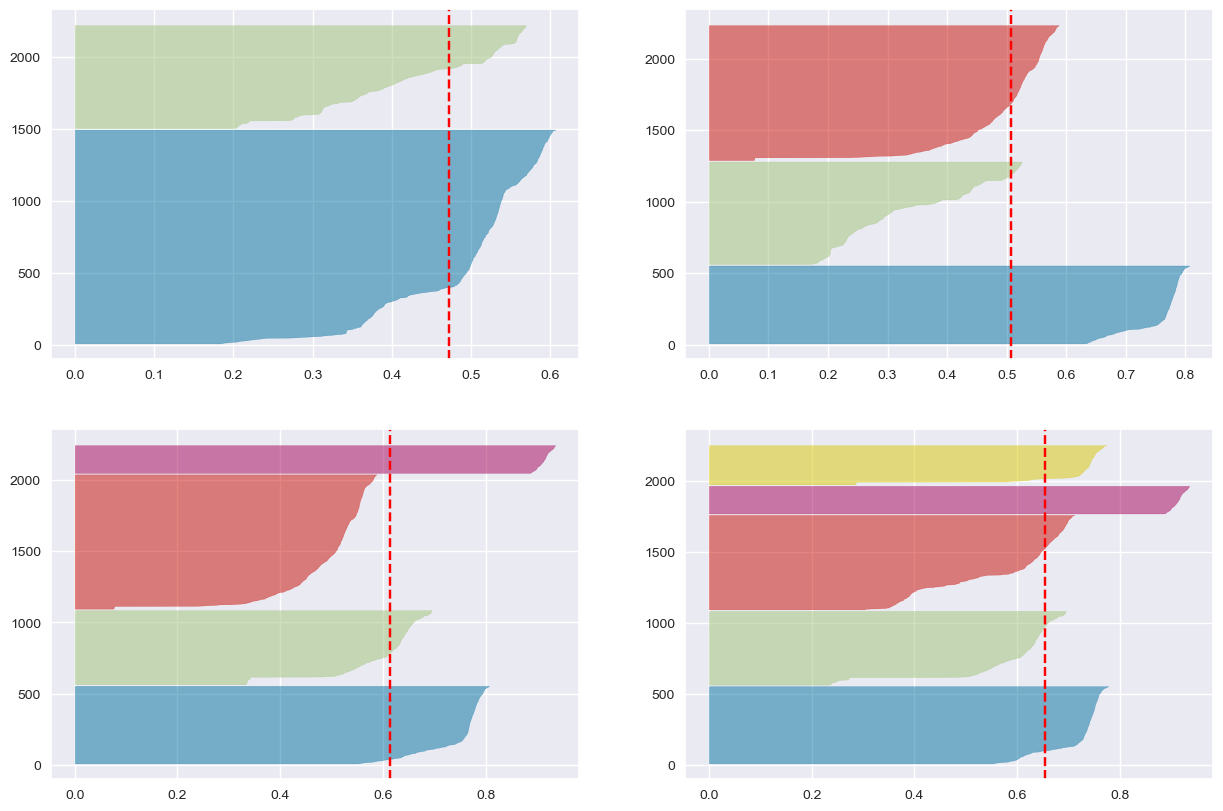

In [69]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,10)) 
for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto") 
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod]) 
    visualizer.fit(df_umap)

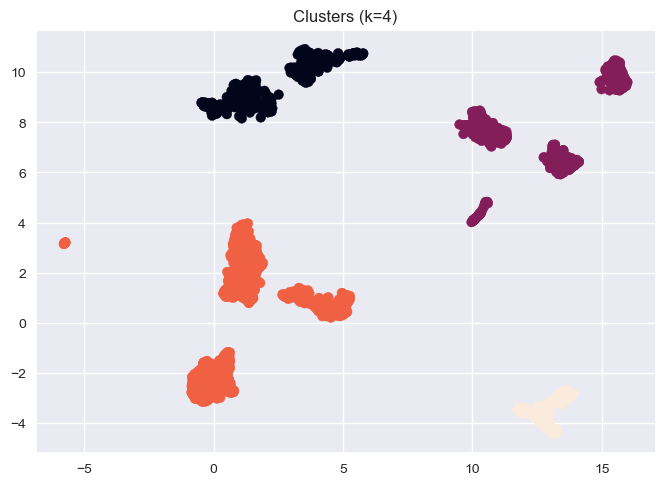

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto")
labels = kmeans.fit_predict(df_umap)
plt.scatter(df_umap[:, 0], df_umap[:, 1], c=labels)
plt.title('Clusters (k=4)')
plt.show()

In [71]:
df_umap = pd.DataFrame(data = df_umap
             , columns = ['PC '+ str(i+1) for i in range(3)])

In [72]:
df_umap['KMeans'] = pd.Series(kmeans.labels_, index=df_umap.index)
df_umap.reset_index(inplace=True)
df_umap.head()

index       PC 1       PC 2      PC 3  KMeans
0      0   4.064867  10.637605  5.811034       0
1      1  13.512263   6.008119  6.849322       1
2      2   0.639305   8.734849  4.540767       0
3      3  -0.300583  -2.900288  2.023181       2
4      4   0.623329  -1.785358  2.504502       2

In [73]:
import plotly.express as px
fig = px.scatter_3d(df_umap, x="PC 1",y="PC 2",z="PC 3", color='KMeans')
fig.show()

In [74]:
df2['KMeans_umap'] = pd.Series(kmeans.labels_, index=df2.index)

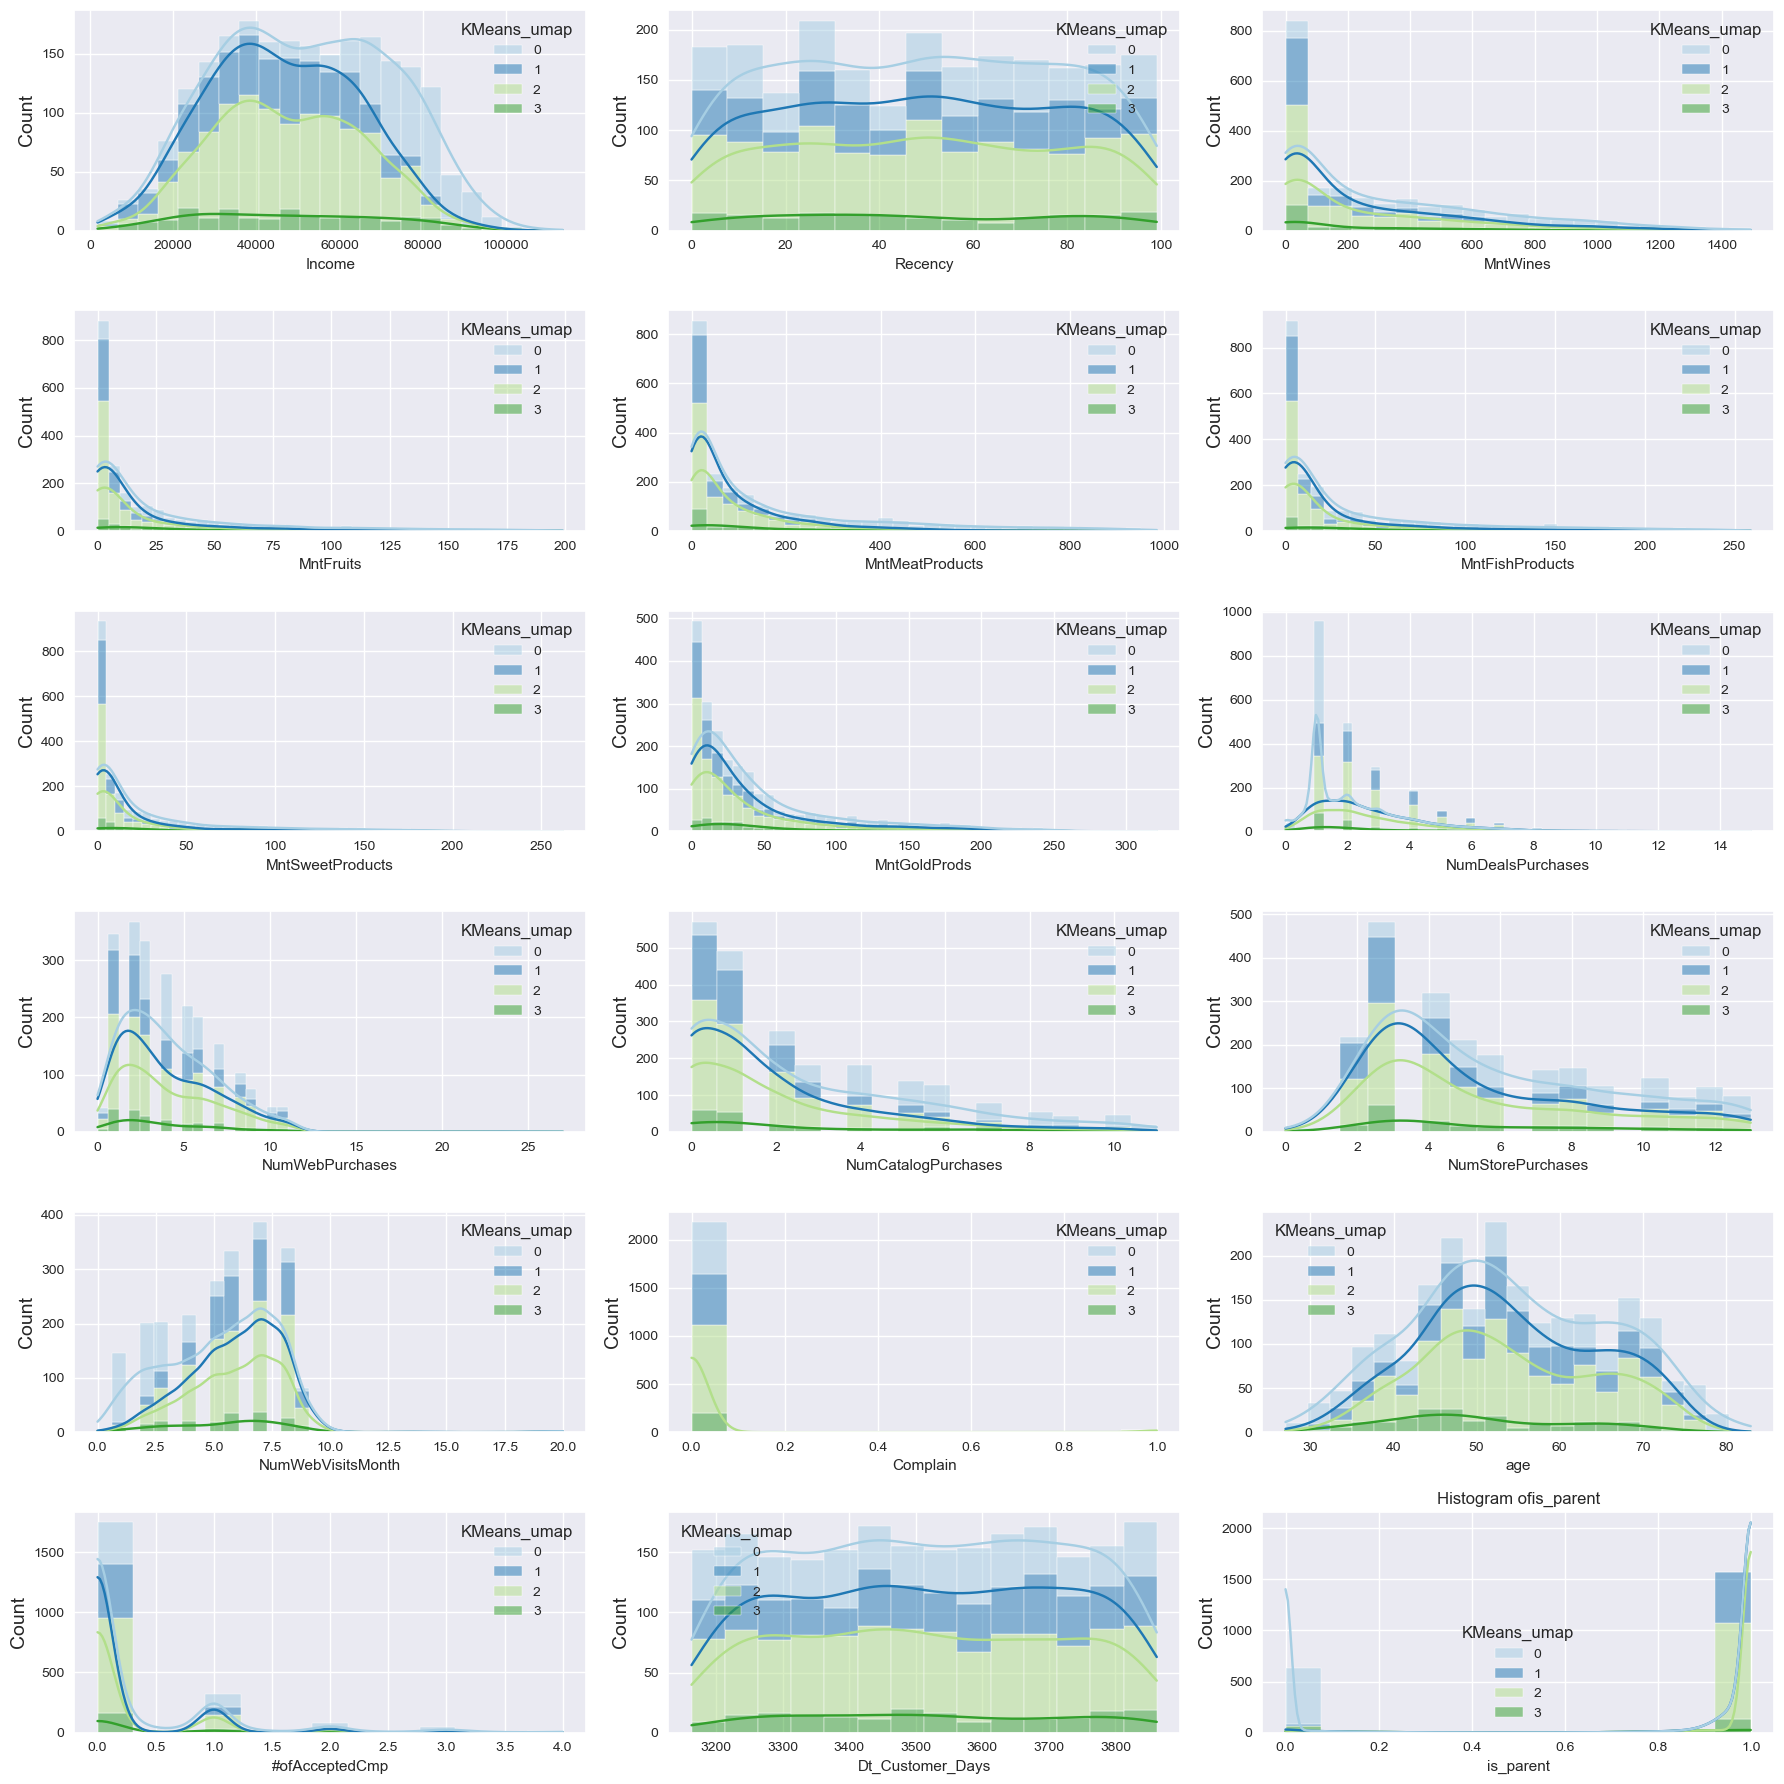

In [75]:
fig,ax=plt.subplots(6,3, figsize=(18,18))
for i,ax in zip(['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'age',
       '#ofAcceptedCmp', 'Dt_Customer_Days','is_parent'],ax.ravel()):
    plt.title("Histogram of" +i)
    h = sns.histplot(df2,x=i,hue="KMeans_umap",
         multiple="stack",kde=True,palette="Paired",
         ax=ax)
    #h.set_xlabel(f'{df2[col].name}', fontsize=14)
    h.set_ylabel('Count', fontsize=14)
    sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

### 4.3 (b) DBSCAN - UMAP

In [76]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.1, stop=10, step=0.1)
min_sample_list=np.arange(start=2, stop=10, step=1)
 
# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()
 
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(df_umap.drop(['index','KMeans'],axis=1))))>1):
            sil_score=silhouette_score(df_umap.drop(['index','KMeans'],axis=1), db.fit_predict(df_umap.drop(['index','KMeans'],axis=1)))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
 
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

score             parameters
0  0.770838  eps:0.7 min_sample :2

In [77]:
clusters = DBSCAN(eps=0.7, min_samples=2).fit(df_tsne.drop(['index','KMeans'],axis=1))


In [78]:
np.unique(clusters.labels_, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176

### 4.3 (a) KMeans - Kernel PCA

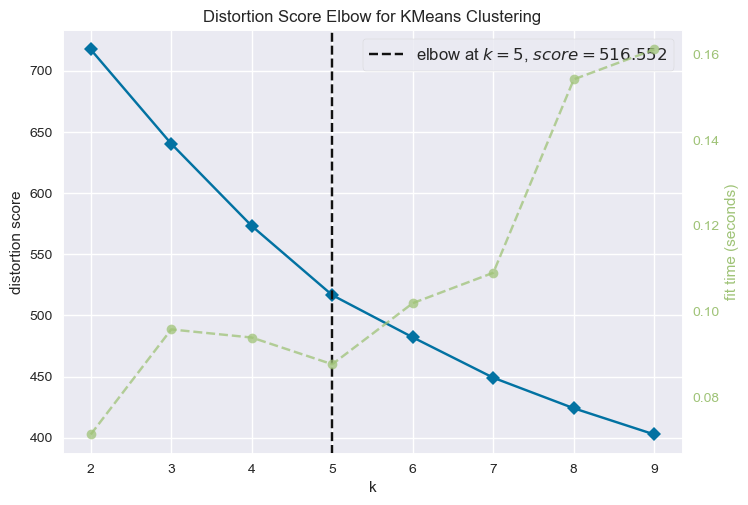

In [79]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df_kpca)        
visualizer.show();      

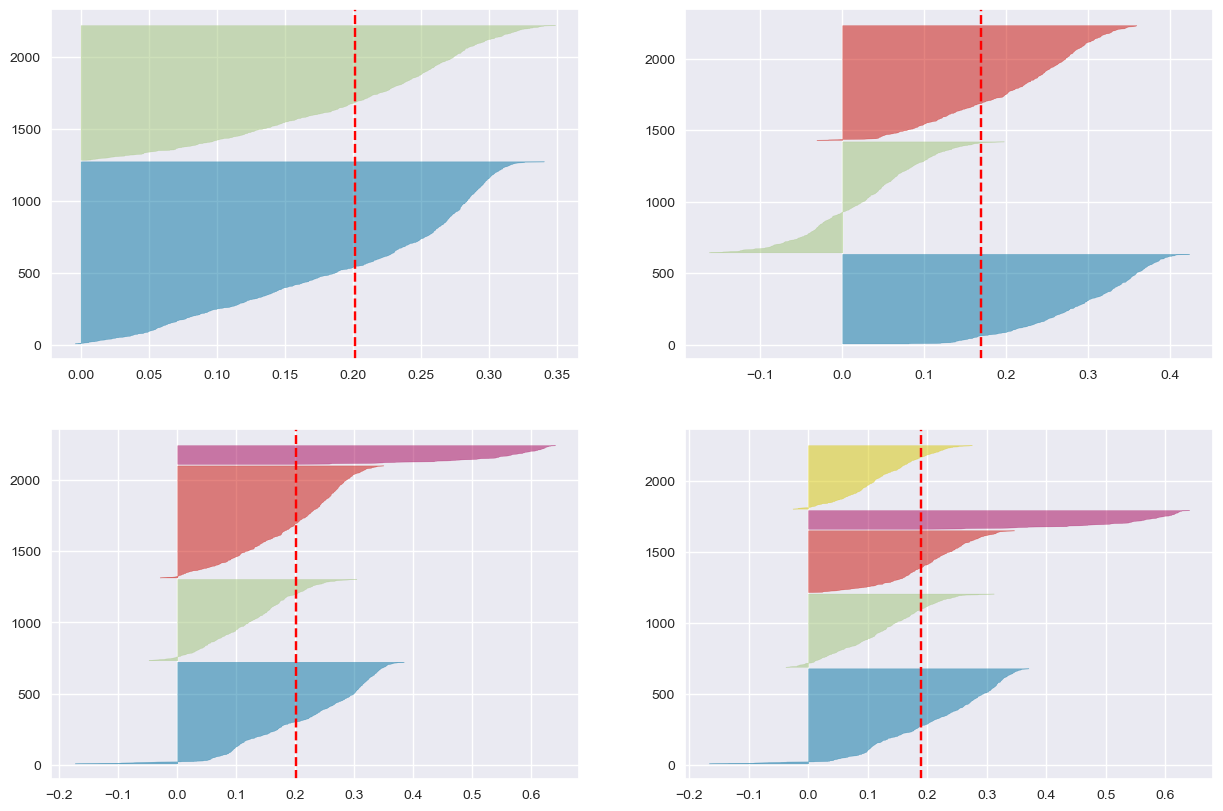

In [80]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,10)) 
for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto") 
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod]) 
    visualizer.fit(df_kpca)

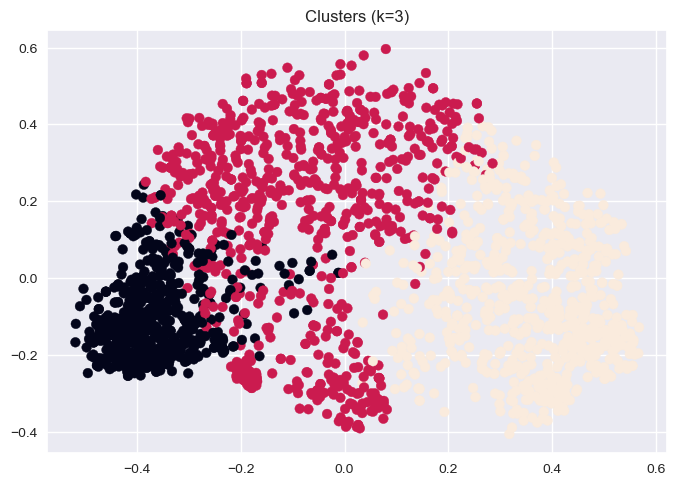

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
labels = kmeans.fit_predict(df_kpca)
plt.scatter(df_kpca[:, 0], df_kpca[:, 1], c=labels)
plt.title('Clusters (k=3)')
plt.show()

In [82]:
df_kpca = pd.DataFrame(data = df_kpca
             , columns = ['PC '+ str(i+1) for i in range(17)])

In [83]:
df_kpca['KMeans'] = pd.Series(kmeans.labels_, index=df_umap.index)
df_kpca.reset_index(inplace=True)
df_kpca.head()

index      PC 1      PC 2      PC 3      PC 4      PC 5      PC 6  \
0      0 -0.414348 -0.149976  0.042495  0.006349 -0.111613 -0.019007   
1      1  0.329488 -0.042074  0.400431 -0.239900  0.265200  0.059672   
2      2 -0.318035  0.120125 -0.174025 -0.241586 -0.147465  0.122419   
3      3  0.503079 -0.170541 -0.269203 -0.082155 -0.126438  0.148188   
4      4  0.124531  0.104691 -0.167176  0.030357 -0.158071 -0.303471   

       PC 7      PC 8      PC 9     PC 10     PC 11     PC 12     PC 13  \
0  0.111569  0.088698 -0.097450 -0.051056 -0.042190  0.227220  0.133027   
1  0.220838 -0.045651 -0.057020  0.011169 -0.032793 -0.100884  0.069997   
2 -0.190194  0.015585 -0.073722 -0.012491  0.136758 -0.137745  0.055620   
3 -0.065006 -0.246912  0.075493 -0.007856  0.013749  0.109576  0.027379   
4 -0.047542 -0.318002 -0.057611 -0.018933  0.240664 -0.032870 -0.037219   

      PC 14     PC 15     PC 16     PC 17  KMeans  
0  0.034111 -0.089463 -0.056562  0.135744       0  
1  0.062646  0.024997  0.016160  0.105744       2  
2  0.157506 -0.093471 -0.084705  0.012066       0  
3  0.007182 -0.008115  0.037304  0.022598       2  
4  0.000601 -0.048756  0.000250 -0.050607       1

In [84]:
import plotly.express as px
fig = px.scatter_3d(df_kpca, x="PC 1",y="PC 2",z="PC 3", color='KMeans')
fig.show()

In [85]:
df2['KMeans_kpca'] = pd.Series(kmeans.labels_, index=df2.index)

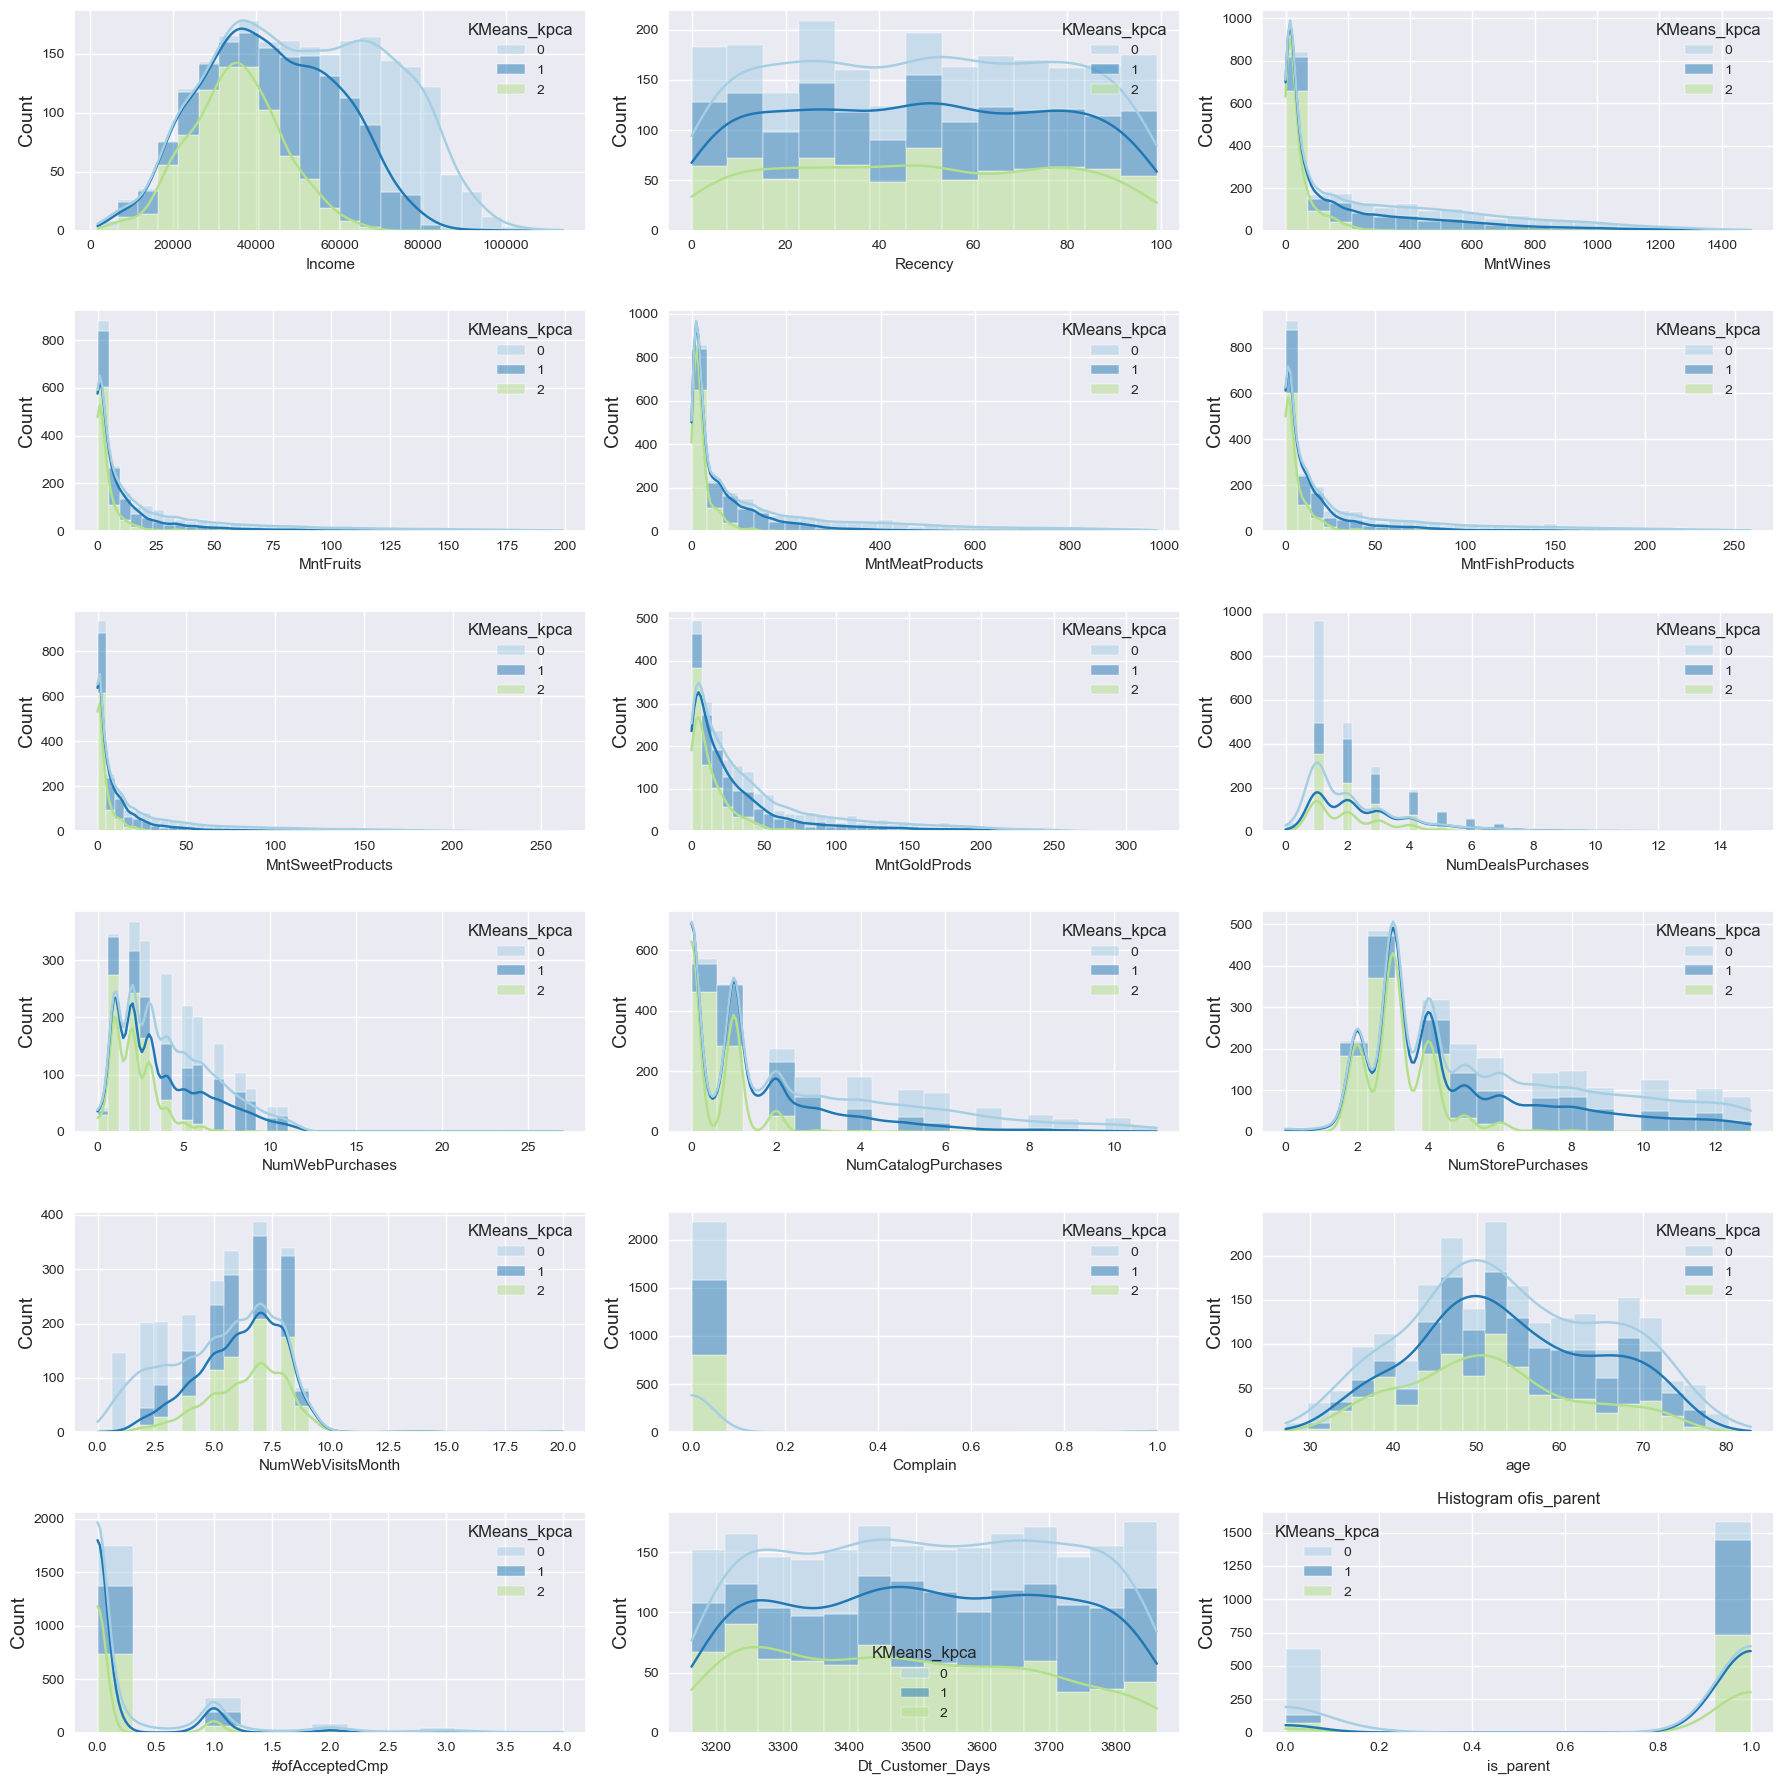

In [86]:
fig,ax=plt.subplots(6,3, figsize=(18,18))
for i,ax in zip(['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'age',
       '#ofAcceptedCmp', 'Dt_Customer_Days','is_parent'],ax.ravel()):
    plt.title("Histogram of" +i)
    h = sns.histplot(df2,x=i,hue="KMeans_kpca",
         multiple="stack",kde=True,palette="Paired",
         ax=ax)
    #h.set_xlabel(f'{df2[col].name}', fontsize=14)
    h.set_ylabel('Count', fontsize=14)
    sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

### 4.3 (b) DBSCAN - UMAP

In [87]:

# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.1, stop=10, step=0.1)
min_sample_list=np.arange(start=2, stop=10, step=1)
 
# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()
 
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(df_kpca.drop(['index','KMeans'],axis=1))))>1):
            sil_score=silhouette_score(df_kpca.drop(['index','KMeans'],axis=1), db.fit_predict(df_kpca.drop(['index','KMeans'],axis=1)))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
 
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

score             parameters
0  0.017699  eps:0.3 min_sample :8

In [88]:
clusters = DBSCAN(eps=0.3, min_samples=8).fit(df_tsne.drop(['index','KMeans'],axis=1))


In [89]:
np.unique(clusters.labels_, return_counts=True)

(array([-1]), array([2204]))

### 4.4 (a) KMeans without Dimensionality Reduction

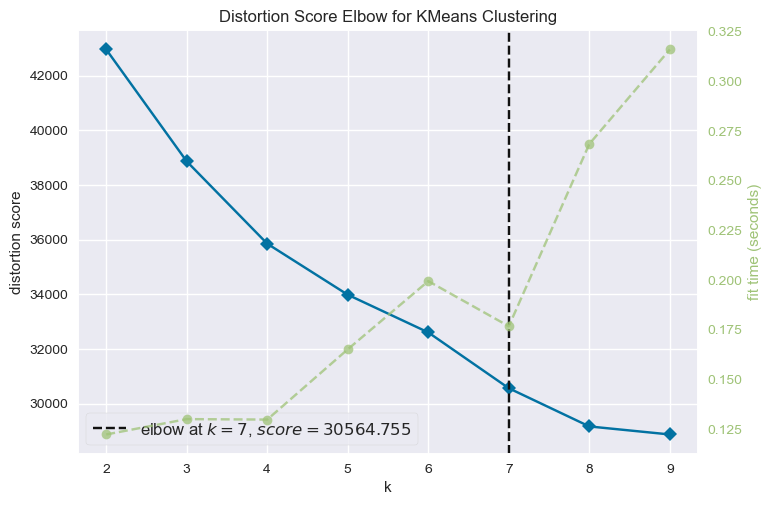

In [90]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df2std)        
visualizer.show();      

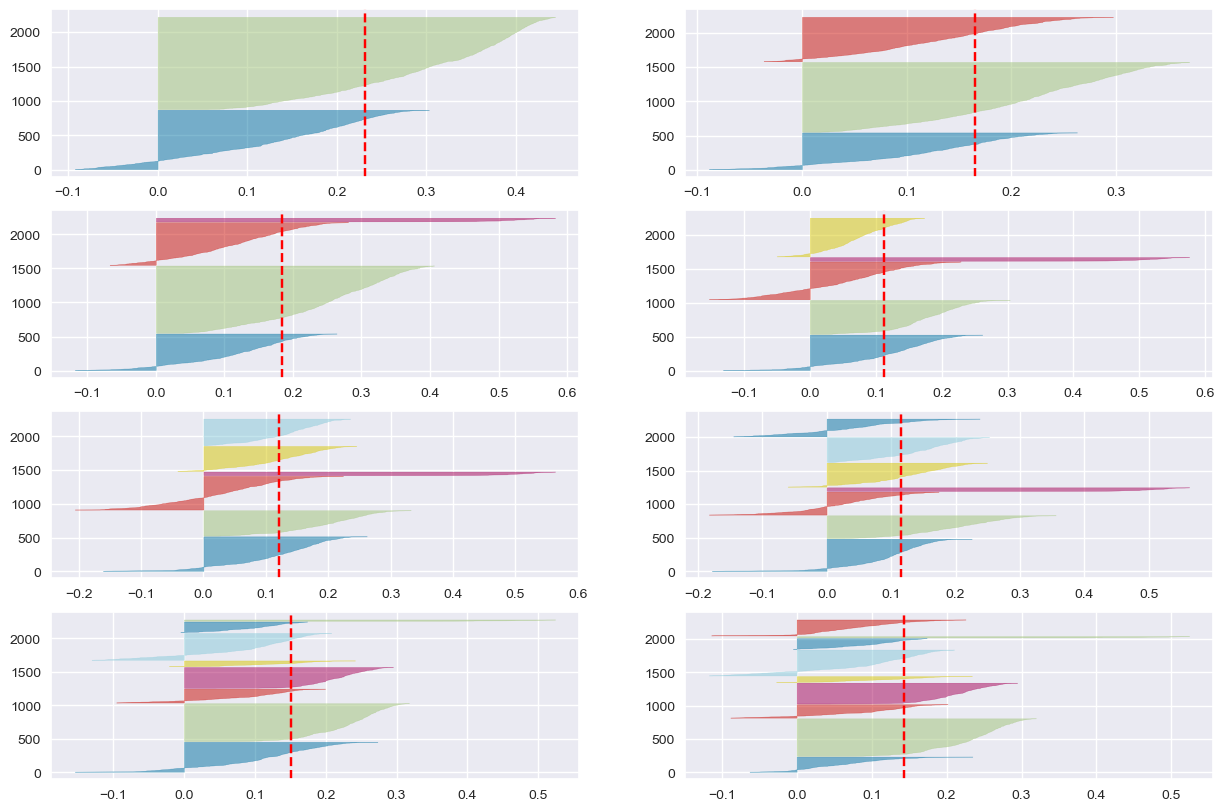

In [91]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(4, 2, figsize=(15,10)) 
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto") 
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod]) 
    visualizer.fit(df2std)

In [92]:
df2['KMeans_only'] = pd.Series(kmeans.labels_, index=df2.index)

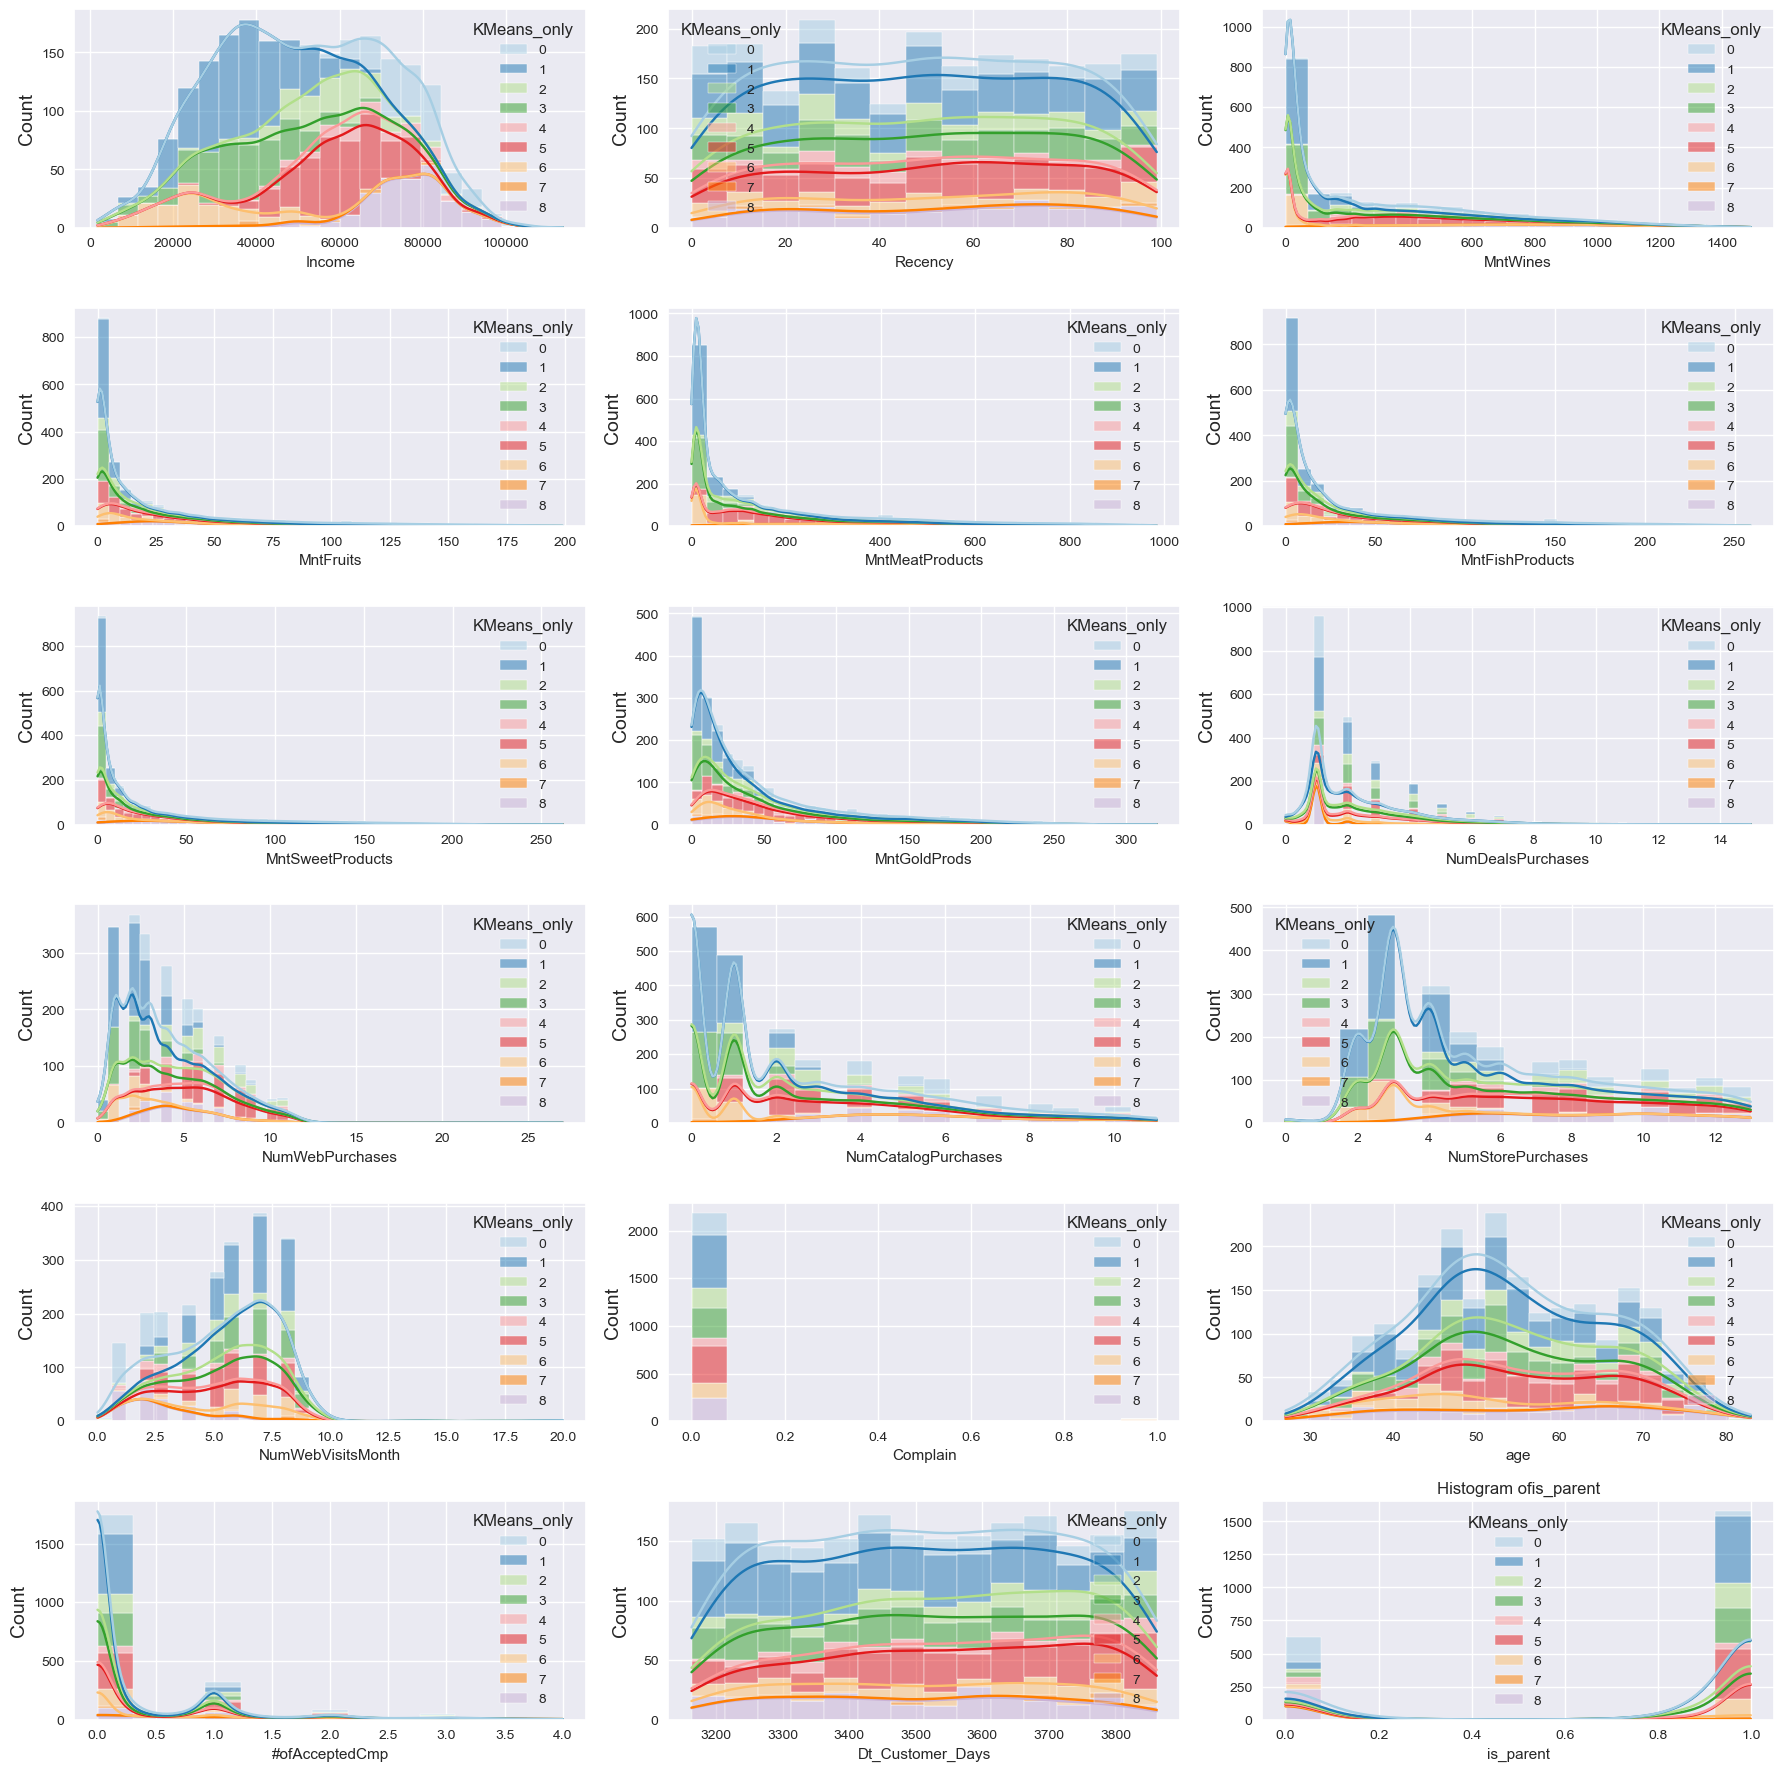

In [93]:
fig,ax=plt.subplots(6,3, figsize=(18,18))
for i,ax in zip(['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'age',
       '#ofAcceptedCmp', 'Dt_Customer_Days','is_parent'],ax.ravel()):
    plt.title("Histogram of" +i)
    h = sns.histplot(df2,x=i,hue="KMeans_only",
         multiple="stack",kde=True,palette="Paired",
         ax=ax)
    #h.set_xlabel(f'{df2[col].name}', fontsize=14)
    h.set_ylabel('Count', fontsize=14)
    sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

### 4.4 (b) DBSCAN without Dimensionality Reduction

In [94]:
# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.1, stop=10, step=0.1)
min_sample_list=np.arange(start=2, stop=10, step=1)
 
# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()
 
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(df2std)))>1):
            sil_score=silhouette_score(df2std, db.fit_predict(df2std))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
 
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

score             parameters
0  0.470991  eps:9.9 min_sample :9

In [95]:
clusters = DBSCAN(eps=9.9, min_samples=9).fit(df2std)


In [96]:
np.unique(clusters.labels_, return_counts=True)

(array([0, 1]), array([2184,   20]))

In [97]:
silhouette_score(df2.iloc[:,0:25], df2['KMeans_pca'].to_numpy())

0.30007383159658574

In [98]:
silhouette_score(df2.iloc[:,0:25], df2['KMeans_tsne'].to_numpy())


-0.045581556306743834

In [99]:
silhouette_score(df2.iloc[:,0:25], df2['KMeans_umap'].to_numpy())


-0.019880273840565434

In [100]:
silhouette_score(df2.iloc[:,0:25], df2['KMeans_kpca'].to_numpy())


0.2020956181808204

In [101]:
silhouette_score(df2.iloc[:,0:25], df2['KMeans_only'].to_numpy())


-0.11968872385269386

In [102]:
from tabulate import tabulate

df =   [['PCA', "0.30007", "0.48032"],['Kernel PCA', "0.20210", "0.01770"],['UMAP', "-0.01988", "0.77084"],['TSNE', "-0.04558", "0.42410"],['Original Features', "-0.11969", "0.47100"]]
  
#define header names
col_names = [" ", "K-means", "DBSCAN"]
  
#display table
print(tabulate(df, headers=col_names, tablefmt="fancy_grid"))

╒═══════════════════╤═══════════╤══════════╕
│                   │   K-means │   DBSCAN │
╞═══════════════════╪═══════════╪══════════╡
│ PCA               │   0.30007 │  0.48032 │
├───────────────────┼───────────┼──────────┤
│ Kernel PCA        │   0.2021  │  0.0177  │
├───────────────────┼───────────┼──────────┤
│ UMAP              │  -0.01988 │  0.77084 │
├───────────────────┼───────────┼──────────┤
│ TSNE              │  -0.04558 │  0.4241  │
├───────────────────┼───────────┼──────────┤
│ Original Features │  -0.11969 │  0.471   │
╘═══════════════════╧═══════════╧══════════╛
